In [1]:
import numpy as np
import os
from keras.preprocessing import image

### Load Test data

In [2]:
path = './Dataset/test'

images = []
labels = []

class_to_idx = {}
for i,cls in enumerate(os.listdir(path)):
    class_to_idx[cls] = i
    
    print(cls)
    for img_name in os.listdir(os.path.join(path,cls)):
        img = image.load_img(os.path.join(path,cls,img_name),target_size=(224,224,3))
        img = image.img_to_array(img)/255
        images.append(img)
        labels.append(i)
        
images = np.asarray(images)
labels = np.asarray(labels)

Covid
Normal


In [3]:
images.shape

(68, 224, 224, 3)

### Load Model

In [4]:
path = './Weights/Scratch/model_6_1.00.h5'

In [5]:
from keras.models import load_model
model = load_model(path)

In [6]:
model.evaluate(images,labels)

3/3 [==============================] - 4s 1s/step - loss: 0.3601 - accuracy: 0.9853


[0.36012834310531616, 0.9852941036224365]

In [7]:
ypred = model.predict_classes(images)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


### plot confusion matrix

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [9]:
plt.style.use('seaborn')

In [10]:
cm = confusion_matrix(labels,ypred)

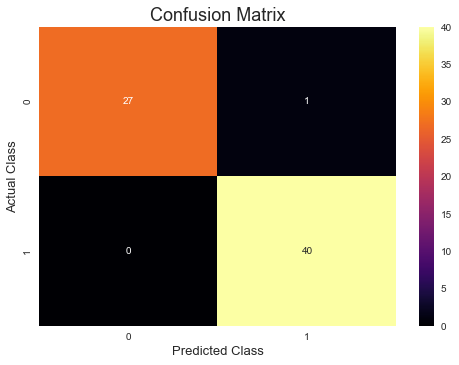

In [11]:
sns.heatmap(cm,annot=True,cmap='inferno')
plt.xlabel('Predicted Class',fontsize=13)
plt.ylabel('Actual Class',fontsize=13)
plt.title('Confusion Matrix',fontsize=18)
plt.show()